# Aktien Analyse Lineare Regression & SVM

In [2]:
#Importieren der Abhängigkeiten
#import quandl
import numpy as np                                     #Arrays

from sklearn.linear_model import LinearRegression      #Lineare Regression 
from sklearn.svm import SVR                            #Lineare Support Vector Machine
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt                        #Darstellung von Daten
from matplotlib import style

from pandas_datareader import data                     #Datenleser zum lesen aus Yahoo Finance

In [3]:
style.use('ggplot')
#quandl.ApiConfig.api_key = "bUDmt8vrvZwCC1zuAsDe"

## Daten lesen
#### Die Daten werden von Yahoo Finance gelesen

In [4]:

#Daten von Yahoo abfragen

#df = quandl.get("WIKI/GOOGL")



df_nasdaq_h = data.DataReader("^NDXT", 
                       start='2015-01-01', 
                       end='2019-11-05', 
                       data_source='yahoo')


#df_real = data.DataReader("GOOGL", 
                       #start='2019-11-04', 
                       #end='2019-12-10', 
                      # data_source='yahoo')
df_google_h = data.DataReader("GOOGL", 
                       start='2015-01-01', 
                       end='2019-11-05', 
                       data_source='yahoo')
# Take a look at the data
df_google_h.head(5)

High         Low        Open       Close   Volume  \
Date                                                                  
2015-01-02  535.799988  527.880005  532.599976  529.549988  1324000   
2015-01-05  527.989990  517.750000  527.150024  519.460022  2059100   
2015-01-06  521.210022  505.549988  520.500000  506.640015  2722800   
2015-01-07  511.489990  503.649994  510.950012  505.149994  2345900   
2015-01-08  507.500000  495.019989  501.510010  506.910004  3652700   

             Adj Close  
Date                    
2015-01-02  529.549988  
2015-01-05  519.460022  
2015-01-06  506.640015  
2015-01-07  505.149994  
2015-01-08  506.910004

In [5]:
df_nasdaq_h.tail(10)

High          Low         Open        Close  Volume  \
Date                                                                     
2019-10-23  4801.390137  4753.520020  4764.370117  4780.899902  230900   
2019-10-24  4880.270020  4830.979980  4835.009766  4878.450195  255900   
2019-10-25  4931.839844  4882.029785  4883.370117  4923.939941  269200   
2019-10-28  4991.709961  4959.660156  4960.350098  4985.399902  274000   
2019-10-29  5002.669922  4956.959961  4993.979980  4958.129883  251400   
2019-10-30  4983.509766  4935.830078  4979.810059  4979.180176  255100   
2019-10-31  4961.990234  4898.259766  4960.720215  4932.700195  317300   
2019-11-01  5018.299805  4960.740234  4970.830078  5017.879883  305900   
2019-11-04  5092.470215  5064.200195  5074.049805  5086.830078  286200   
2019-11-05  5106.740234  5070.290039  5105.430176  5087.669922  272900   

              Adj Close  
Date                     
2019-10-23  4780.899902  
2019-10-24  4878.450195  
2019-10-25  4923.939941  
2019-10-28  4985.399902  
2019-10-29  4958.129883  
2019-10-30  4979.180176  
2019-10-31  4932.700195  
2019-11-01  5017.879883  
2019-11-04  5086.830078  
2019-11-05  5087.669922

In [6]:
df_google_h.tail(10)

High          Low         Open        Close   Volume  \
Date                                                                      
2019-10-23  1258.040039  1240.209961  1240.209961  1257.630005  1064100   
2019-10-24  1262.900024  1252.349976  1259.109985  1259.109985  1011200   
2019-10-25  1268.000000  1249.150024  1252.000000  1264.300049  1355200   
2019-10-28  1299.239990  1272.310059  1275.000000  1288.979980  3271400   
2019-10-29  1280.800049  1255.609985  1276.000000  1260.660034  2632700   
2019-10-30  1268.020020  1250.650024  1255.150024  1260.699951  1460200   
2019-10-31  1266.520020  1249.479980  1260.000000  1258.800049  1595000   
2019-11-01  1273.000000  1259.709961  1265.800049  1272.250000  1440600   
2019-11-04  1292.500000  1276.109985  1276.109985  1289.609985  1531600   
2019-11-05  1297.239990  1289.380005  1291.199951  1291.439941  1257100   

              Adj Close  
Date                     
2019-10-23  1257.630005  
2019-10-24  1259.109985  
2019-10-25  1264.300049  
2019-10-28  1288.979980  
2019-10-29  1260.660034  
2019-10-30  1260.699951  
2019-10-31  1258.800049  
2019-11-01  1272.250000  
2019-11-04  1289.609985  
2019-11-05  1291.439941

In [7]:
#df_google_h['Adj Close'] = df_google_h['Adj Close'].diff(periods = -1)
#df_google_h.dropna(inplace = True)

In [8]:
#df_nasdaq_h['Adj Close'] = df_google_h['Adj Close'].diff(periods = -1)
#df_nasdaq_h.dropna(inplace = True)

In [9]:
#df_google_h = df_google_h[['Adj Close']].where(df_google_h[['Adj Close']]>0)/df_nasdaq_h[['Adj Close']].where(df_nasdaq_h[['Adj Close']]>0)

In [10]:
df_google_h = df_google_h[['Adj Close']]*100/df_nasdaq_h[['Adj Close']]

In [11]:
df_google_h.rename(columns = {'Adj Close': 'Google/Nasdaq'}, inplace = True)

In [12]:
df_google_h.dropna(inplace=True)

#df_real = df_real[['Adj Close']]
#Take a look at the new data
df_google_h.tail(50)

Google/Nasdaq
Date                     
2019-08-27      25.553432
2019-08-28      25.589791
2019-08-29      25.528640
2019-08-30      25.365992
2019-09-03      25.224085
2019-09-04      25.000475
2019-09-05      24.993350
2019-09-06      24.854947
2019-09-09      24.811793
2019-09-10      24.845295
2019-09-11      24.825308
2019-09-12      25.103363
2019-09-13      25.297597
2019-09-16      25.236562
2019-09-17      25.105331
2019-09-18      25.181201
2019-09-19      25.395046
2019-09-20      25.528223
2019-09-23      25.562251
2019-09-24      25.663585
2019-09-25      25.835387
2019-09-26      25.687477
2019-09-27      25.908908
2019-09-30      25.591405
2019-10-01      25.551767
2019-10-02      25.352222
2019-10-03      25.244234
2019-10-04      25.298801
2019-10-07      25.357301
2019-10-08      25.635377
2019-10-09      25.514959
2019-10-10      25.466439
2019-10-11      25.107599
2019-10-14      25.138514
2019-10-15      25.230524
2019-10-16      25.577026
2019-10-17      25.756262
2019-10-18      25.877983
2019-10-21      25.533383
2019-10-22      25.768571
2019-10-23      26.305299
2019-10-24      25.809631
2019-10-25      25.676594
2019-10-28      25.855097
2019-10-29      25.426120
2019-10-30      25.319428
2019-10-31      25.519492
2019-11-01      25.354333
2019-11-04      25.351938
2019-11-05      25.383721

In [13]:
forecast_out = 30 #'n=30' Tage
#Create another column (the target or dependent variable) shifted 'n' units up
df_google_h['Prediction'] = df_google_h[['Google/Nasdaq']].shift(-forecast_out)
#print the new data set
df_google_h.tail()

Google/Nasdaq  Prediction
Date                                 
2019-10-30      25.319428         NaN
2019-10-31      25.519492         NaN
2019-11-01      25.354333         NaN
2019-11-04      25.351938         NaN
2019-11-05      25.383721         NaN

In [14]:
X = np.array(df_google_h.drop(['Prediction'],1))

#Remove the last 'n' rows
X = X[:-forecast_out]
print(X)

#X_real = df_real[['Adj Close']]

[[22.38752395]
 [22.32210759]
 [22.18816144]
 ...
 [25.52822296]
 [25.56225135]
 [25.66358508]]


In [15]:

### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array (All of the values including the NaN's)
y = np.array(df_google_h['Prediction'])
# Get all of the y values except the last 'n' rows
y = y[:-forecast_out]
print(y)

[22.75843957 22.7267982  22.77852657 ... 25.3543335  25.35193756
 25.38372106]


In [16]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
# Create and train the Support Vector Machine (Regressor)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [18]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.7731326581628054


In [19]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.7574008939348871


In [21]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(df_google_h.drop(['Prediction'],1))[-forecast_out:]
x_forecast

array([[25.83538741],
       [25.68747706],
       [25.90890821],
       [25.59140533],
       [25.55176733],
       [25.35222158],
       [25.24423441],
       [25.29880084],
       [25.35730078],
       [25.63537683],
       [25.51495862],
       [25.46643938],
       [25.10759936],
       [25.13851421],
       [25.23052376],
       [25.57702595],
       [25.75626192],
       [25.87798299],
       [25.53338301],
       [25.76857064],
       [26.30529881],
       [25.80963082],
       [25.67659362],
       [25.855097  ],
       [25.42611961],
       [25.31942823],
       [25.51949235],
       [25.3543335 ],
       [25.35193756],
       [25.38372106]])

In [22]:
# Print linear regression model predictions for the next 'n' days
lr_prediction = lr.predict(x_forecast)
lr_prediction

# Print support vector regressor model predictions for the next 'n' days
svm_prediction = svr_rbf.predict(x_forecast)
svm_prediction

array([26.06719868, 25.95564629, 26.12226819, 25.88262708, 25.85233149,
       25.69745768, 25.61116063, 25.65504574, 25.70146467, 25.91611206,
       25.82408792, 25.78666661, 25.4982065 , 25.52419307, 25.60003421,
       25.8716499 , 26.00764242, 26.0991392 , 25.83823944, 26.01692494,
       26.40967903, 26.04784267, 25.94739926, 26.08198931, 25.75537357,
       25.67148255, 25.827573  , 25.69912429, 25.6972335 , 25.72224224])

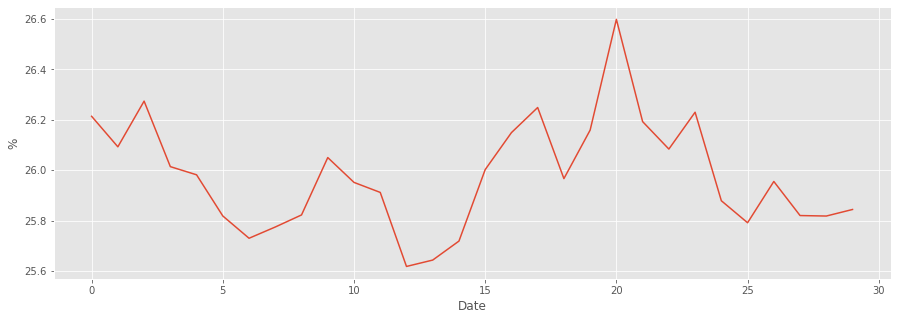

In [23]:
plt.figure(figsize=(15,5))
#plt.axis(xmax=60)
plt.xlabel('Date')
plt.ylabel('%')
plt.plot(lr_prediction)


NameError: name 'X_real' is not defined

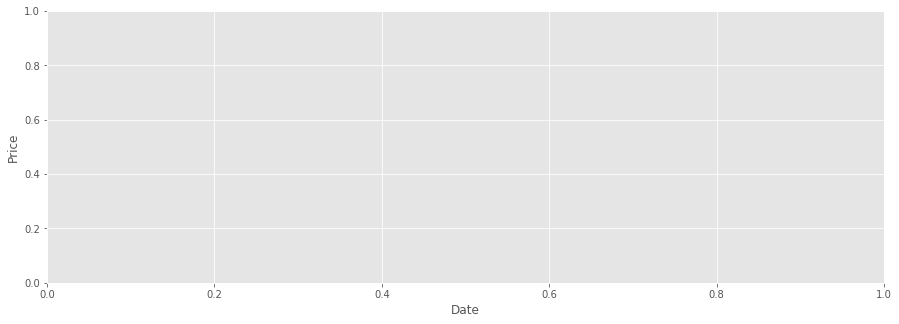

In [24]:
plt.figure(figsize=(15,5))
#plt.axis(ymax=1320)
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(X_real)

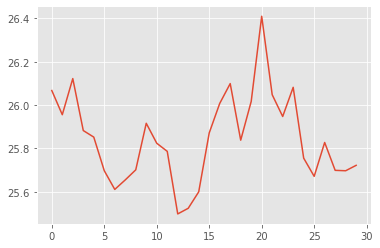

In [25]:
plt.plot(svm_prediction)